** FastAI Computer Vision Tutorial **
https://docs.fast.ai/tutorial.vision.html

In [1]:
# installing/upgrading fastai2 
!pip install --upgrade fastai

from fastai.vision.all import *


In [2]:
%matplotlib inline

path = untar_data(URLs.PETS)


In [3]:
??path

Type:        PosixPath
String form: /root/.fastai/data/oxford-iiit-pet
File:        /opt/conda/lib/python3.10/pathlib.py
Source:     
class PosixPath(Path, PurePosixPath):
    """Path subclass for non-Windows systems.

    On a POSIX system, instantiating a Path should return this object.
    """
    __slots__ = ()

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
files = get_image_files(path/"images")
len(files)

7390

In [9]:
files[1],files[5]

(Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_18.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_79.jpg'))

In [7]:
def label_func(f): return f[0].isupper()

In [10]:
def label_func(f): return f[0].isupper()

In [11]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

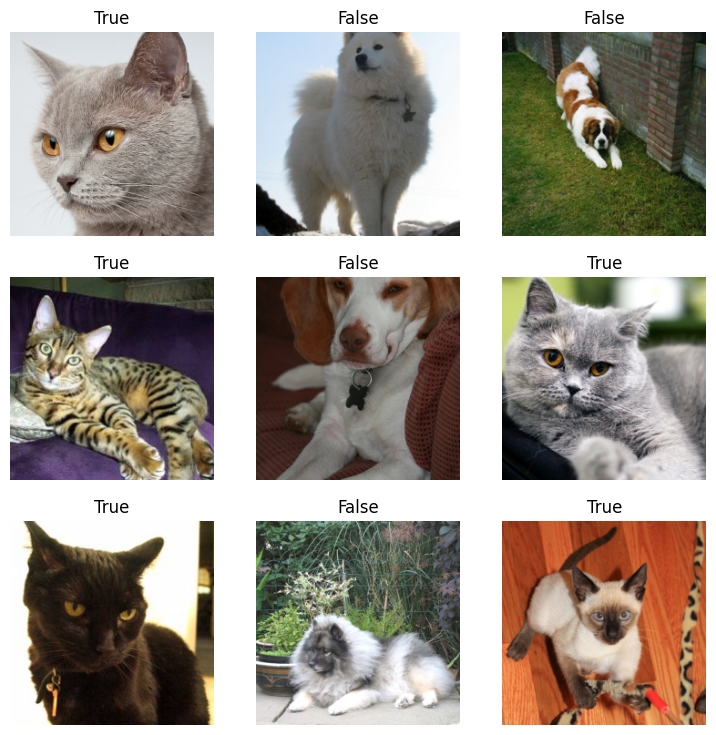

In [13]:
dls.show_batch()